In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

In [2]:
# Logfájl elérési útja
log_path = "training_log.csv"  

# Beolvasás
log_df = pd.read_csv(log_path)

# MAE és idő normalizálása
log_df["mae_norm"] = (log_df["test_mae"] - log_df["test_mae"].min()) / (log_df["test_mae"].max() - log_df["test_mae"].min())
log_df["time_norm"] = (log_df["elapsed_time"] - log_df["elapsed_time"].min()) / (log_df["elapsed_time"].max() - log_df["elapsed_time"].min())

# Kombinált metrika kiszámítása
log_df["score"] = log_df["mae_norm"] + log_df["time_norm"]

# Top 3 modell kiválasztása
top3 = log_df.sort_values("score").head(3)
top3_models = top3["training"].tolist()

# Megjelenítés
top3[["training", "test_mae", "elapsed_time", "score"]]


,training,test_mae,elapsed_time,score
7,logs\train_loss_H32_L1_LR0.001_BS1024_S7_PAT10...,2.054539,30.13,0.046402
10,logs\train_loss_H16_L1_LR0.001_BS1024_S7_PAT10...,2.048037,45.17,0.166678
8,logs\train_loss_H32_L1_LR0.0003_BS1024_S7_PAT1...,2.030494,70.39,0.360305


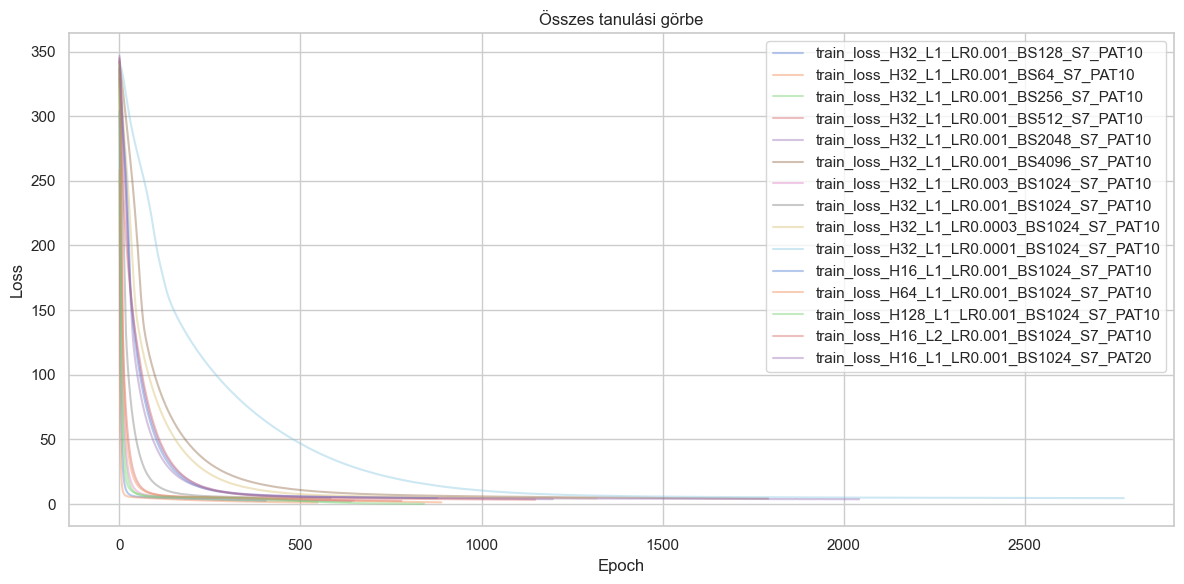

In [19]:
plt.figure(figsize=(12, 6))

for log_file in log_df["training"]:
    if os.path.exists(log_file):
        df = pd.read_csv(log_file)
        plt.plot(df["train_loss"], alpha=0.4, label=os.path.basename(log_file).split(".csv")[0])

plt.title("Összes tanulási görbe")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "all_training_curves.png"))
plt.show()


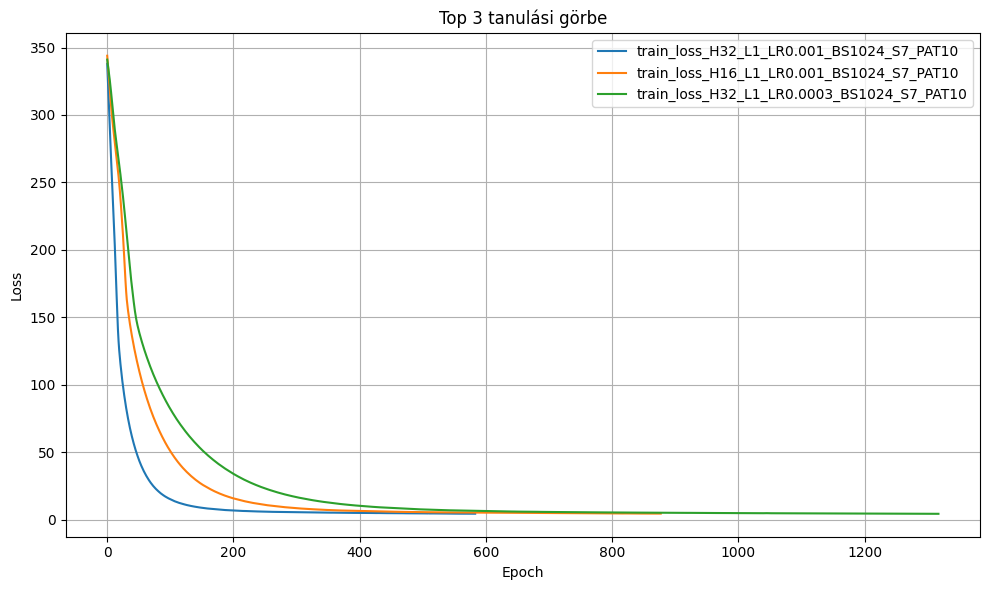

In [4]:
plt.figure(figsize=(10, 6))

for log_file in top3_models:
    if os.path.exists(log_file):
        df = pd.read_csv(log_file)
        plt.plot(df["train_loss"], label=os.path.basename(log_file).split(".csv")[0])

plt.title("Top 3 tanulási görbe")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top3_training_curves.png"))
plt.show()


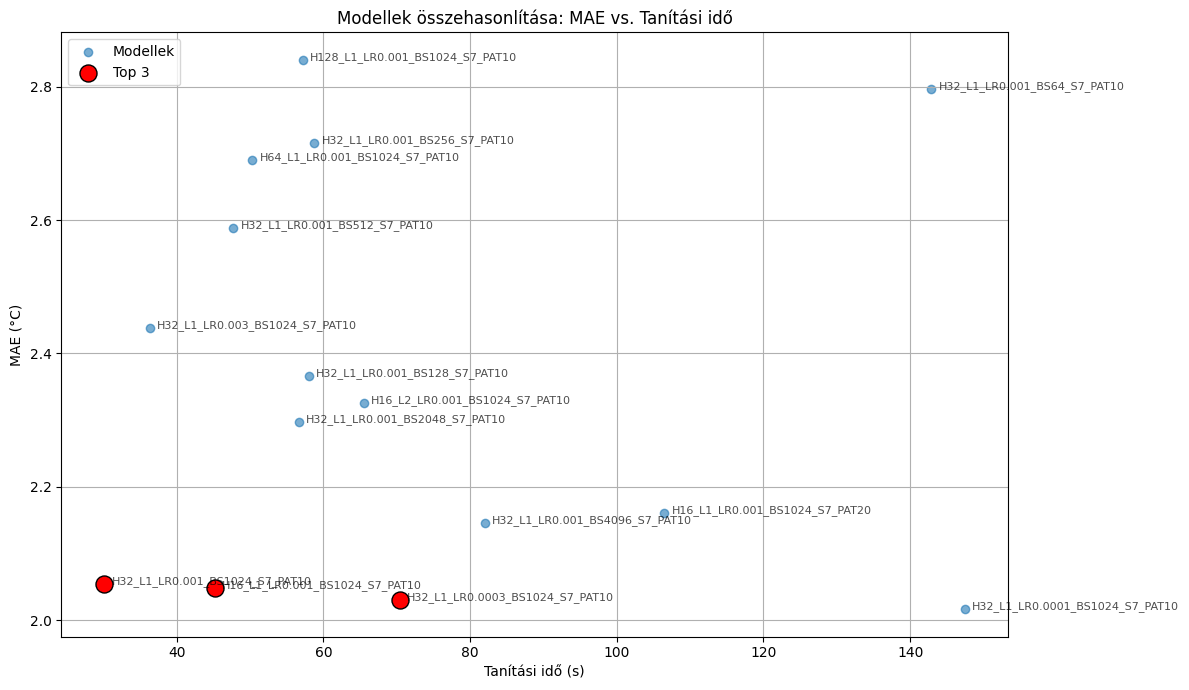

In [5]:
# Ábra létrehozása
plt.figure(figsize=(12, 7))
plt.scatter(log_df["elapsed_time"], log_df["test_mae"], alpha=0.6, label="Modellek")
plt.scatter(top3["elapsed_time"], top3["test_mae"], color="red", edgecolors="black", s=150, label="Top 3")

# Minden modell címkézése
for i, row in log_df.iterrows():
    name = row["training"].split("\\")[-1].replace("train_loss_", "").replace(".csv", "")
    plt.text(row["elapsed_time"] + 1, row["test_mae"], name, fontsize=8, alpha=0.7)

# Tengelyek, cím, stílus
plt.xlabel("Tanítási idő (s)")
plt.ylabel("MAE (°C)")
plt.title("Modellek összehasonlítása: MAE vs. Tanítási idő")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "mae_vs_time.png"))
plt.show()

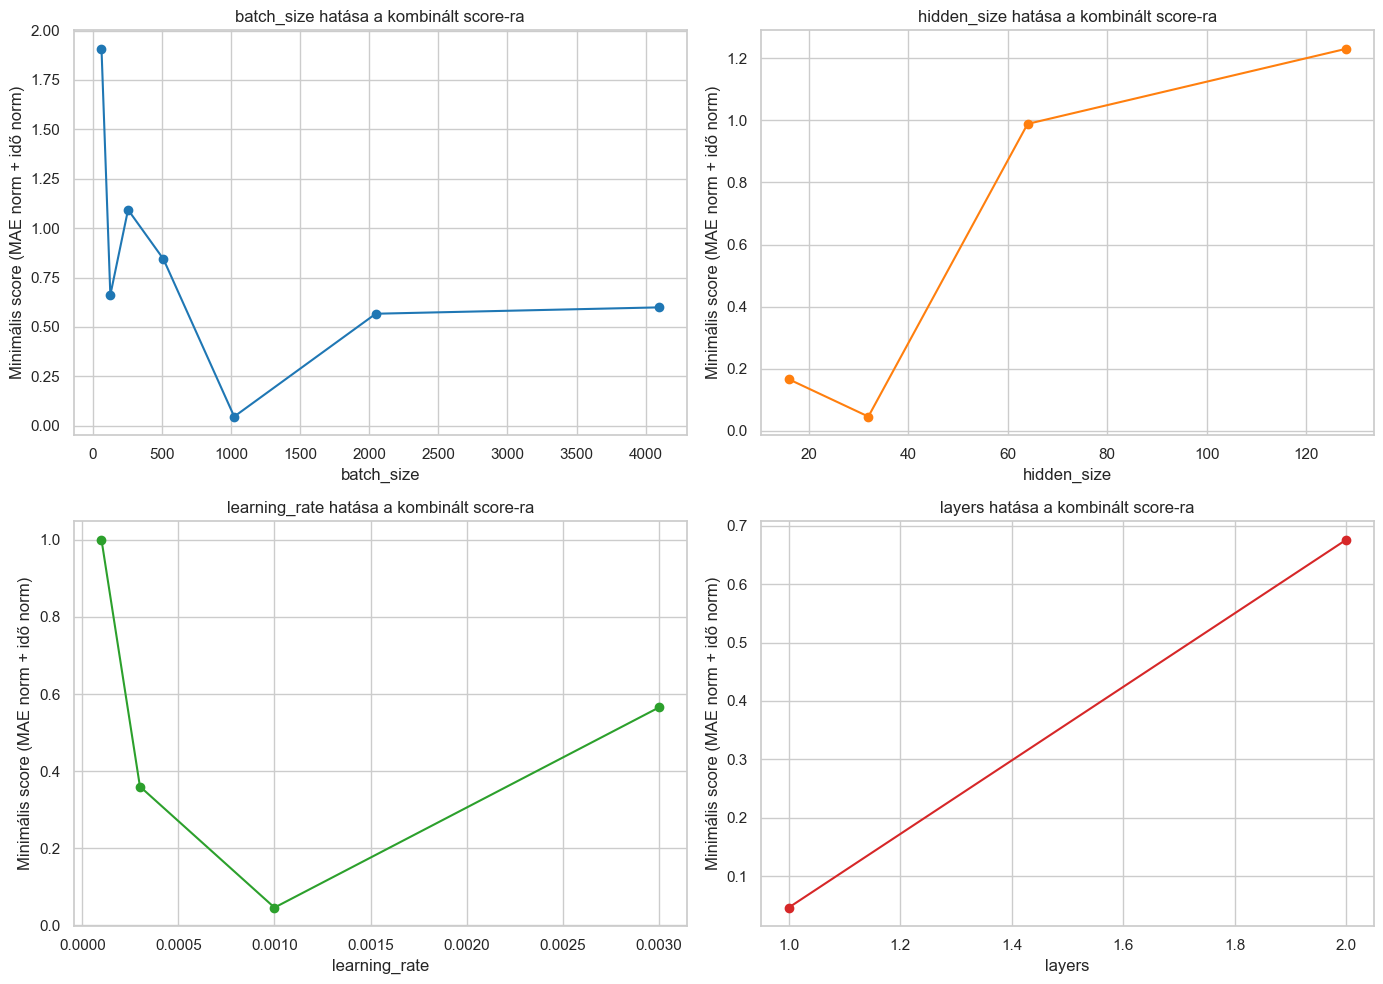

In [17]:
# Paraméterek és színek
param_list = ["batch_size", "hidden_size", "learning_rate", "layers"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

# Alábrák beállítása
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Minden hiperparaméterre külön alábra
for idx, param in enumerate(param_list):
    grouped = log_df.groupby(param)["score"].min().reset_index()
    grouped = grouped.sort_values(by=param)

    axes[idx].plot(grouped[param], grouped["score"], marker="o", linestyle="-", color=colors[idx])
    axes[idx].set_title(f"{param} hatása a kombinált score-ra")
    axes[idx].set_xlabel(param)
    axes[idx].set_ylabel("Minimális score (MAE norm + idő norm)")
    axes[idx].grid(True)

plt.tight_layout()
plt.savefig("plots/score_vs_hyperparams_grid.png")
plt.show()